# Explore here

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import requests

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)


In [2]:
#Paso 5. Realizar solicitudes API
artist_uri = "1rTUwYS38LkQTlT2fhikch"
results = spotify.artist_top_tracks(artist_uri, country='ES')['tracks']
print(results)

[{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3S9Hg7sRKhmtWunFZ2yAYP'}, 'href': 'https://api.spotify.com/v1/artists/3S9Hg7sRKhmtWunFZ2yAYP', 'id': '3S9Hg7sRKhmtWunFZ2yAYP', 'name': 'El Bogueto', 'type': 'artist', 'uri': 'spotify:artist:3S9Hg7sRKhmtWunFZ2yAYP'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', 'CV', 'CW

In [3]:
#Paso 6. Transofrmar a pandas DataFrame 
df = pd.DataFrame(results)
df["duration_min_sec"] = df["duration_ms"].apply(
    lambda x: f"{x//60000}:{int((x%60000)/1000):02d}")
df = df[["name", "popularity", "duration_min_sec"]]
df


,name,popularity,duration_min_sec
0,Cuando No Era Cantante,83,3:31
1,Ruina,71,3:54
2,LA 125,60,3:14
3,Sin Ti,58,3:26
4,METALLICA,58,3:48
5,Tu Aroma (feat. Kaydy Cain),56,2:13
6,Ready Pa Morir,56,3:11
7,#Freemolly (Intro),56,2:40
8,Infierno,56,3:20
9,Konbini Wars,56,2:53


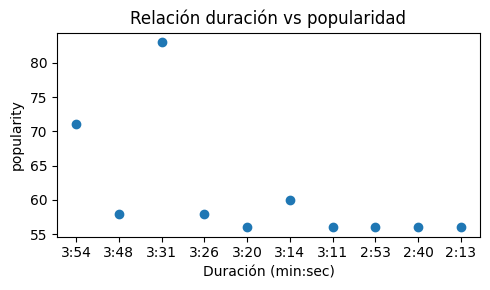

In [9]:
#Paso 7. Analizar relación estadística
df_sorted = df.sort_values(by='duration_min_sec', ascending=False)
plt.figure(figsize=(5, 3))
plt.scatter(df_sorted['duration_min_sec'], df_sorted['popularity'])
plt.title('Relación duración vs popularidad')
plt.xlabel('Duración (min:sec)'); plt.ylabel('popularity')
plt.tight_layout(); plt.show()

Podríamos decir que a mayor duración mayor popularidad aunque la cantidad de datos usados no es suficientemente robusta como para ser representativa para afirmar esta relación.